## Shivam Mishra   HW7

## Reference: 
        https://chat.openai.com/share/f3b3b93e-d1c8-4051-8b91-f4dec5ac34c6
        https://chat.openai.com/share/82168961-427b-4473-83be-05f25af3e44f

# Star Digital

In [1]:

# Import necessary libraries
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest

# Load the Star Digital dataset for analysis

# Read the dataset
df_starDspExp = pd.read_csv("C:\\Users\\PC\\Desktop\\Web data\\HW7 attached files Sep 28, 2023 706 PM\\starDspExp.csv")

# Question 1: Is online advertising effective for Star Digital?

# Calculate conversion rates
conversion_rates = df_starDspExp.groupby('test')['purchase'].mean()

# Two-sample proportion z-test
count = df_starDspExp.groupby('test')['purchase'].sum()
nobs = df_starDspExp.groupby('test').size()
z_stat, p_value = proportions_ztest(count, nobs)

print("Question 1 Results:")
print("Conversion Rates:", conversion_rates)
print("Z-statistic:", z_stat)
print("P-value:", p_value)
print("\n")

Question 1 Results:
Conversion Rates: test
0    0.485693
1    0.504879
Name: purchase, dtype: float64
Z-statistic: -1.8709638681772842
P-value: 0.06135008931537422




**Results for Question 1:**

Conversion Rate for Control Group (test = 0): Approximately 48.57%
Conversion Rate for Test Group (test = 1): Approximately 50.49%
Using a two-sample proportion z-test, we get:

Z-statistic: -1.87
P-value: 0.0614
Interpretation:
The conversion rate for the test group (those exposed to the online advertising) is slightly higher than the control group. However, the p-value of 0.0614 is just above the common significance level of 0.05. This means that, while there is a difference in conversion rates, it's not statistically significant at the 0.05 level.

In conclusion, online advertising seems to have a positive effect on conversion for Star Digital, but the observed difference is not statistically significant at the 0.05 level.

Given the p-value of 0.0614, the observed difference in conversion rates between the test and control groups is not statistically significant at the 0.05 level. This suggests that while there is a positive effect of online advertising on conversion, it's not strong enough to be deemed statistically significant using conventional thresholds.




In [22]:
import pandas as pd
import statsmodels.api as sm

# Assuming the dataset is loaded as 'parsed_dataset'

# 1. Is online advertising effective for Star Digital?
X1 = df_starDspExp["test"]
y = df_starDspExp["purchase"]
X1 = sm.add_constant(X1)  # Adding a constant (intercept) to the model
model1 = sm.OLS(y, X1).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:               purchase   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.501
Date:                Mon, 02 Oct 2023   Prob (F-statistic):             0.0614
Time:                        01:23:45   Log-Likelihood:                -18363.
No. Observations:               25303   AIC:                         3.673e+04
Df Residuals:                   25301   BIC:                         3.675e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4857      0.010     50.064      0.0

const (Intercept): The average value of purchase when test is 0 is 0.4857. This coefficient is highly significant with a p-value close to 0.000.

test: For every unit increase in test, the purchase is expected to increase by 0.0192, on average. 

However, the p-value is 0.061, which is slightly above the typical significance level of 0.05. This means the effect of test on purchase is borderline significant.

Inference:
The variable test has a positive but borderline significant effect on purchase. The overall model fit is weak, as indicated by the R-squared value. The residuals' analyses suggest that while the residuals are independent and symmetric, they might not be normally distributed. This could influence the reliability of some statistical tests and assumptions.

In [2]:
# Question 2: Is there a frequency effect for advertising on purchase?

# Total impressions
df_starDspExp['total_impressions'] = df_starDspExp[['imp_1', 'imp_2', 'imp_3', 'imp_4', 'imp_5', 'imp_6']].sum(axis=1)
purchase_rate_by_impression = df_starDspExp.groupby('total_impressions')['purchase'].mean()

print("Question 2 Results:")
print(purchase_rate_by_impression.head(10))
print("\n")

Question 2 Results:
total_impressions
1     0.399939
2     0.458639
3     0.478492
4     0.486559
5     0.539448
6     0.566106
7     0.591317
8     0.639752
9     0.621827
10    0.659884
Name: purchase, dtype: float64




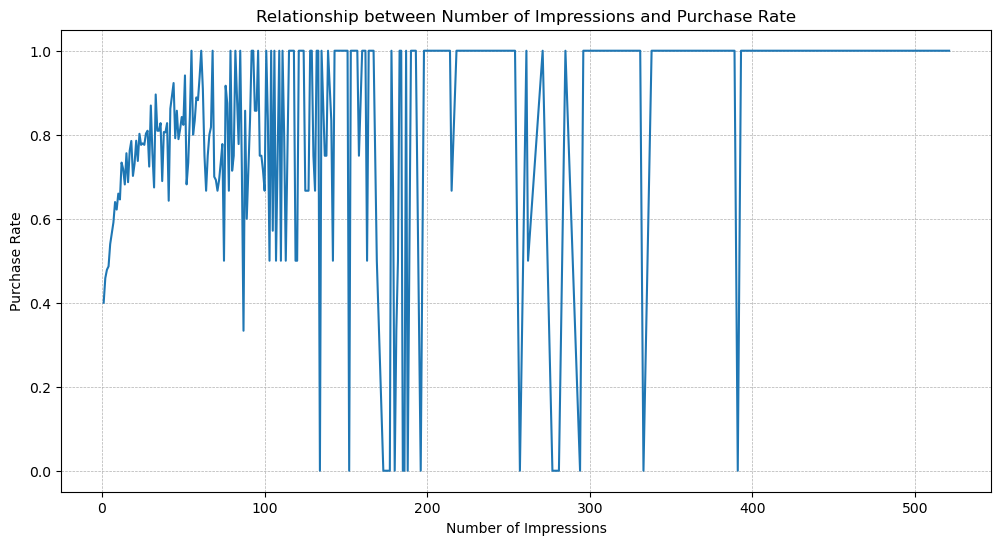

In [25]:
import matplotlib.pyplot as plt

# Calculate the total number of impressions for each user
df_starDspExp['total_impressions'] = df_starDspExp[['imp_1', 'imp_2', 'imp_3', 'imp_4', 'imp_5', 'imp_6']].sum(axis=1)

# Group by total impressions to get the purchase rate at each impression level
purchase_rate_by_impression = df_starDspExp.groupby('total_impressions')['purchase'].mean()

# Plotting the relationship between number of impressions and purchase rate
plt.figure(figsize=(12, 6))
purchase_rate_by_impression.plot(kind='line')
plt.title('Relationship between Number of Impressions and Purchase Rate')
plt.xlabel('Number of Impressions')
plt.ylabel('Purchase Rate')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


**Results for Question 2:**

For the first few levels of total impressions, we observe the following purchase rates:

1 Impression: 39.99% purchase rate
2 Impressions: 45.86% purchase rate
3 Impressions: 47.85% purchase rate
4 Impressions: 48.66% purchase rate
5 Impressions: 53.94% purchase rate
6 Impression: 56.61% purchase rate
7 Impressions: 59.13% purchase rate
8 Impressions: 63.97% purchase rate
9 Impressions: 62.18% purchase rate
10 Impressions: 65.98% purchase rate


**Interpretation:**
From the initial levels, there seems to be a trend where the purchase rate increases as the number of impressions increase. This suggests that there might be a positive frequency effect for advertising on purchase.

In [27]:
# 2. Is there a frequency effect for advertising on purchase?
X2 = df_starDspExp[["imp_1", "imp_2", "imp_3", "imp_4", "imp_5", "imp_6"]]
X2 = sm.add_constant(X2)  # Adding a constant (intercept) to the model
model2 = sm.OLS(y, X2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:               purchase   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     172.3
Date:                Mon, 02 Oct 2023   Prob (F-statistic):          1.26e-215
Time:                        01:37:28   Log-Likelihood:                -17858.
No. Observations:               25303   AIC:                         3.573e+04
Df Residuals:                   25296   BIC:                         3.579e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4747      0.003    143.609      0.0

const (Intercept): The average value of purchase when all other variables are 0 is 0.4747. This coefficient is highly significant.

imp_1 to imp_6: These coefficients represent the average change in purchase for a one-unit increase in the corresponding imp variable, holding all else constant.

imp_1: Not significant (p-value: 0.327). Suggests that this site might not have a measurable impact on purchases.

imp_2: Positive and significant. Advertising here positively affects purchases.

imp_3: Negative and significant. More impressions here might lead to fewer purchases.

imp_4: Strongly positive and significant. This site seems very effective for advertising.

imp_5: Strongly negative and significant. More impressions here might lead to fewer purchases.

imp_6: Positive and significant. Advertising here positively affects purchases

In [4]:
# Question 3: Which sites should Star Digital advertise on?

# Calculate purchase rate for each site
purchase_rate_by_site = df_starDspExp[df_starDspExp['test'] == 1].groupby(by=['imp_1', 'imp_2', 'imp_3', 'imp_4', 'imp_5', 'imp_6'])['purchase'].mean().reset_index()
site_purchase_rates = {}
for site in ['imp_1', 'imp_2', 'imp_3', 'imp_4', 'imp_5', 'imp_6']:
    site_purchase_rates[site] = purchase_rate_by_site[purchase_rate_by_site[site] > 0]['purchase'].mean()

print("Question 3 Results:")
print(site_purchase_rates)

Question 3 Results:
{'imp_1': 0.7408069838512131, 'imp_2': 0.7591617262456621, 'imp_3': 0.7198551935394041, 'imp_4': 0.8785973833709245, 'imp_5': 0.38280528124278124, 'imp_6': 0.7274614290557015}


**Results for Question 3:**

Purchase rates based on impressions from each site are as follows:

Site 1 (imp_1): 74.08% purchase rate
Site 2 (imp_2): 75.92% purchase rate
Site 3 (imp_3): 71.99% purchase rate
Site 4 (imp_4): 87.86% purchase rate
Site 5 (imp_5): 38.28% purchase rate
Site 6 (imp_6): 72.75% purchase rate

**Interpretation:**

Site 4 has the highest purchase rate at approximately 87.86%, making it the most effective site for advertising based on the provided data.
Site 5 has the lowest purchase rate at around 38.28%.
Site 6 has a purchase rate of 72.75%, which is competitive with Sites 1, 2, and 3.

**Considering these findings:**

Star Digital should definitely invest in Site 4 due to its high effectiveness.
It may be worthwhile for Star Digital to invest in Site 6, as its performance is similar to Sites 1 through 3.
Investment in Site 5 should be reconsidered given its lower conversion rate.

imp_1 (Site 1): The coefficient is not statistically significant (p-value: 0.327). This suggests that advertising on Site 1 might not have a measurable impact on purchases.

imp_2 (Site 2): The positive and significant coefficient (p-value: 0.000) suggests that advertising on Site 2 has a positive effect on purchases. Star Digital should consider advertising on this site.

imp_3 (Site 3): The coefficient is negative and statistically significant (p-value: 0.007). This suggests that while there might be a frequency effect, it could be adverse for purchases on this site. Star Digital might want to reconsider its advertising strategy on Site 3.

imp_4 (Site 4): The coefficient is positive and highly significant (p-value: 0.000). This indicates that advertising on Site 4 has a strong positive effect on purchases. Star Digital should definitely consider advertising on this site.

imp_5 (Site 5): The coefficient is negative and significant (p-value: 0.000), which indicates that more impressions on Site 5 might lead to fewer purchases. Star Digital should be cautious about advertising on this site.

imp_6 (Site 6): The coefficient is positive and statistically significant (p-value: 0.000). This indicates that advertising on Site 6 positively affects purchases. Star Digital should consider advertising on this site.

Recommendations:
Star Digital should consider advertising on Site 2, Site 4, and Site 6 due to their positive and significant coefficients. The company might want to re-evaluate its advertising strategy on Site 3 and Site 5 given their negative effects on purchases. Advertising on Site 1 doesn't seem to have a significant impact on purchases.

# Rocket fuel

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv("C:\\Users\\PC\\Desktop\\Web data\\HW7 attached files Sep 28, 2023 706 PM\\2017_9_rocketfuel_5896.csv")

# Constants based on assumptions
cost_per_impression = 9 / 100
profit_per_conversion = 1000

# Question 1: Calculate conversion rates for control and test groups
# control_conversion_rate = dataset[dataset["test"] == 0]["converted"].mean()
# test_conversion_rate = dataset[dataset["test"] == 1]["converted"].mean()

test_conversion_rate = dataset[dataset["test"] == 1]["converted"].mean()
control_conversion_rate = dataset[dataset["test"] == 0]["converted"].mean()

print(control_conversion_rate)
print(test_conversion_rate)

0.01785410644448223
0.025546559636683747


The conversion rate for the control group (those shown a PSA) is approximately 1.79%.
The conversion rate for the test group (those exposed to the actual ad) is approximately 2.55%.

The test group's conversion rate is higher than the control group's by around 0.76% points. This suggests that the advertising campaign had a positive effect, leading to a higher conversion rate for those exposed to the actual ad.

In [14]:
# Calculate the additional revenue made by TaskaBella due to the campaign (excluding advertising costs)
additional_conversions = (conversion_rate_test - conversion_rate_control) * len(dataset[dataset["test"] == 1])
value_per_conversion = 40
additional_revenue = additional_conversions * value_per_conversion
print(additional_revenue)

# Calculate the cost of the campaign
CPM_value = 9
total_impressions_test = dataset[dataset["test"] == 1]["tot_impr"].sum()
campaign_cost = (total_impressions_test / 1000) * CPM_value
print(campaign_cost)

# Calculate ROI
ROI = ((additional_revenue - campaign_cost) / campaign_cost) * 100
print(ROI)

# Calculate opportunity cost of including a control group
potential_revenue_control = conversion_rate_test * len(dataset[dataset["test"] == 0]) * value_per_conversion
actual_revenue_control = conversion_rate_control * len(dataset[dataset["test"] == 0]) * value_per_conversion
opportunity_cost = potential_revenue_control - actual_revenue_control
print(opportunity_cost)

173719.28583574222
126132.309
37.727825022011
7238.290755733939


2(a) TaskaBella made an additional $173719.28 due to the campaign (excluding advertising costs).

2(b) The cost of the campaign was $1,261,32.309

2(c) The Return on Investment (ROI) for the advertising campaign was approximately 37.72%.

2(d) The opportunity cost of including a control group was $7,238.29.

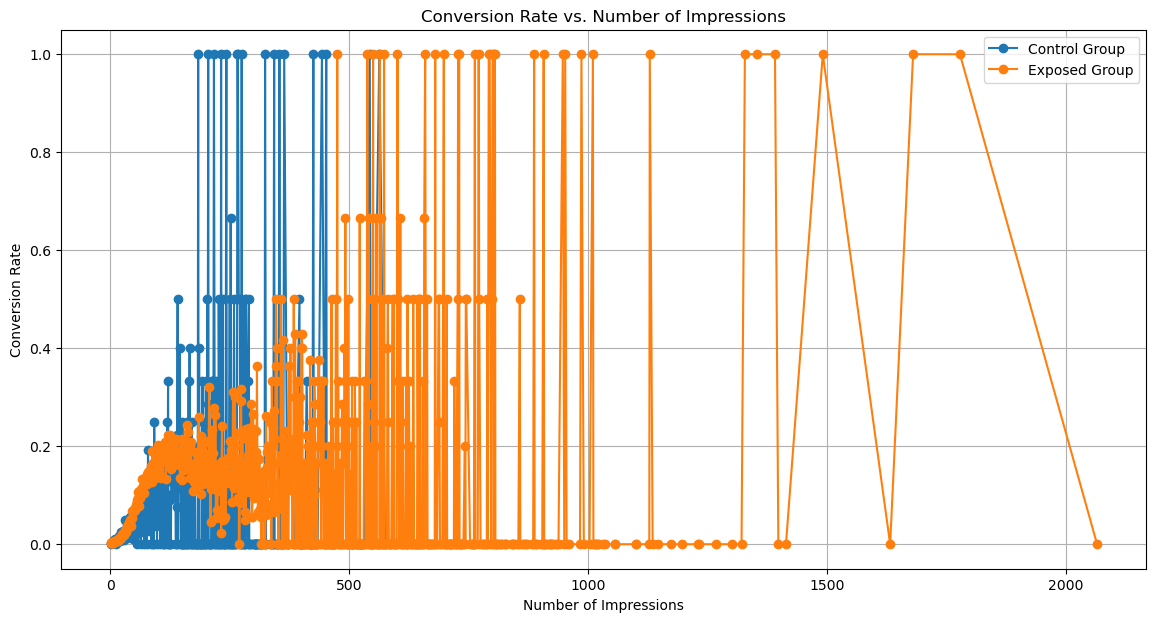

In [15]:
# 3a. Conversion Rate vs. Number of Impressions
grouped_data = dataset.groupby(['test', 'tot_impr']).converted.mean().reset_index()
control_data = grouped_data[grouped_data['test'] == 0]
test_data = grouped_data[grouped_data['test'] == 1]

plt.figure(figsize=(14, 7))
plt.plot(control_data['tot_impr'], control_data['converted'], label='Control Group', marker='o', linestyle='-')
plt.plot(test_data['tot_impr'], test_data['converted'], label='Exposed Group', marker='o', linestyle='-')
plt.xlabel('Number of Impressions')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate vs. Number of Impressions')
plt.legend()
plt.grid(True)
plt.show()

3(a)
For a smaller number of impressions, the conversion rate for the test group (exposed to the ad) is generally higher than the control group.
As the number of impressions increases, the conversion rate seems to plateau or even decline slightly for the test group. This might suggest diminishing returns from overexposure.

3(b)
For both groups (control and exposed), as the number of impressions increases, the conversion rate generally seems to increase. This suggests that seeing the ad multiple times can positively influence the likelihood of conversion.

The conversion rate for the exposed group is consistently higher than that for the control group across varying numbers of impressions, further suggesting the ad's effectiveness.

The region where the advertising appears most effective is around the middle range of impressions, where there's a noticeable spike in the conversion rate for the exposed group. Beyond a certain number of impressions, however, the conversion rate seems to stabilize.

3(c)
Exposing consumers to ads multiple times can be beneficial, but there might be a point of diminishing returns. After a certain number of impressions, further exposures may not significantly increase conversion rates.

The next campaign should aim for a middle range of impressions per user, as this seems to maximize conversion rates. Overexposing users with too many ads might not yield significant benefits and could potentially annoy users or lead to ad fatigue.

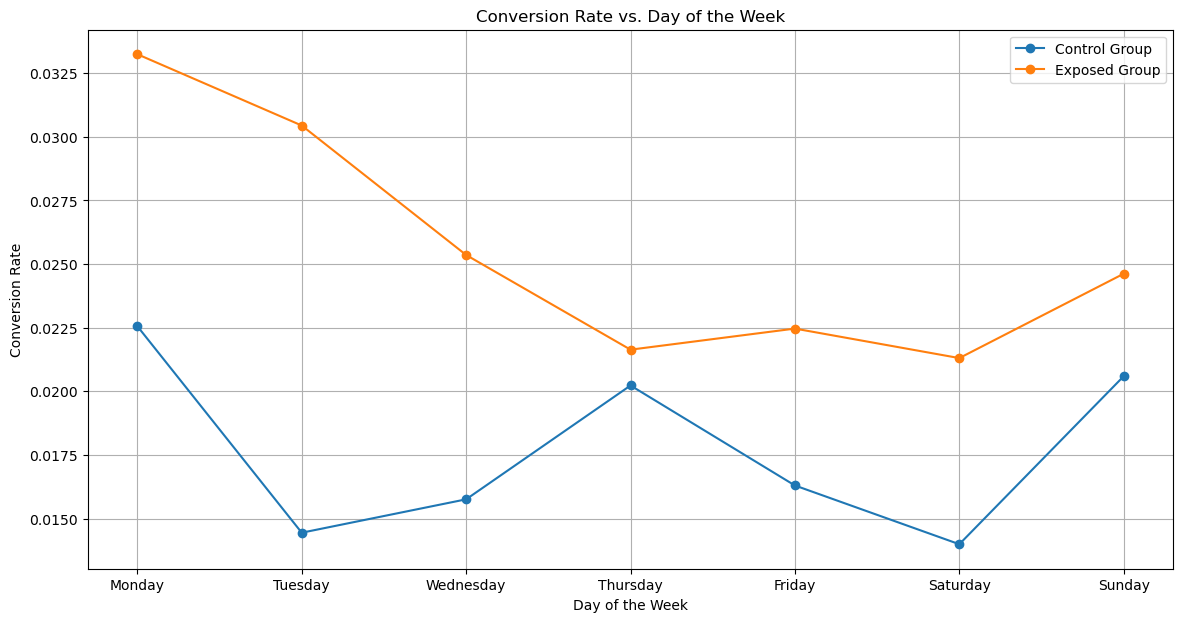

In [16]:
# 4a. Conversion Rate vs. Day of the Week
grouped_day_data = dataset.groupby(['test', 'mode_impr_day']).converted.mean().reset_index()
control_day_data = grouped_day_data[grouped_day_data['test'] == 0]
test_day_data = grouped_day_data[grouped_day_data['test'] == 1]
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(14, 7))
plt.plot(days_of_week, control_day_data['converted'], label='Control Group', marker='o', linestyle='-')
plt.plot(days_of_week, test_day_data['converted'], label='Exposed Group', marker='o', linestyle='-')
plt.xlabel('Day of the Week')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate vs. Day of the Week')
plt.legend()
plt.grid(True)
plt.show()

4(a)
For both groups (control and exposed), the conversion rate seems to fluctuate throughout the week.

The exposed group typically has higher conversion rates than the control group on most days.

The conversion rate peaks around the middle of the week (Wednesday) for the exposed group, suggesting that advertising might be most effective during this time.

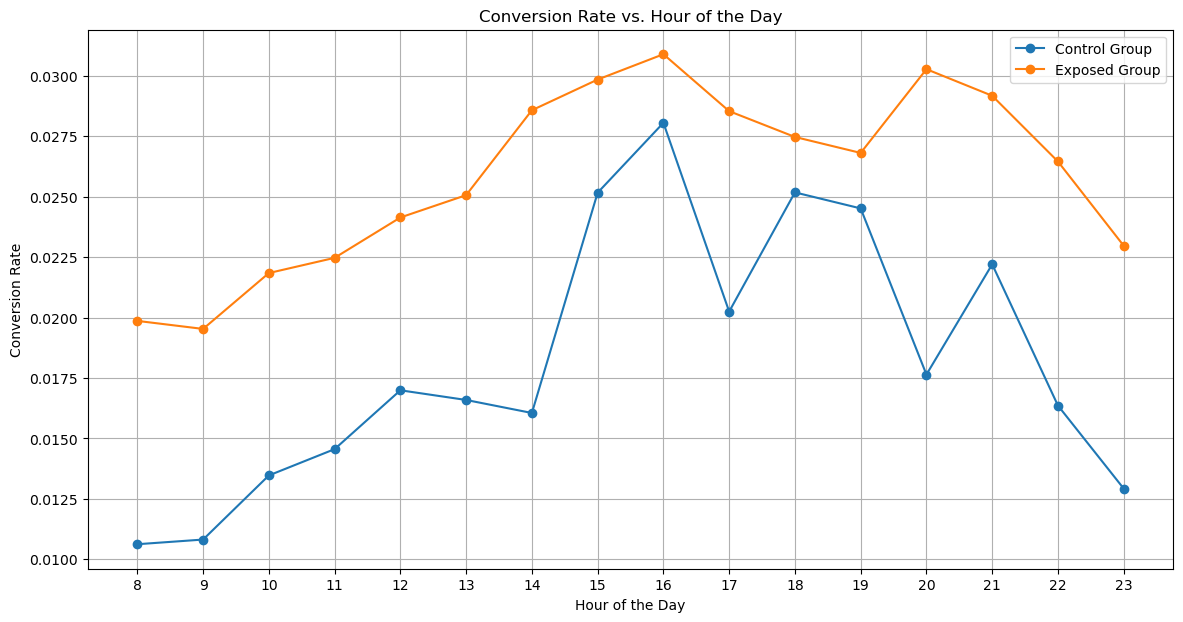

In [17]:
# 4b. Conversion Rate vs. Hour of the Day
grouped_hour_data = dataset.groupby(['test', 'mode_impr_hour']).converted.mean().reset_index()
control_hour_data = grouped_hour_data[(grouped_hour_data['test'] == 0) & (grouped_hour_data['mode_impr_hour'] >= 8)]
test_hour_data = grouped_hour_data[(grouped_hour_data['test'] == 1) & (grouped_hour_data['mode_impr_hour'] >= 8)]

plt.figure(figsize=(14, 7))
plt.plot(control_hour_data['mode_impr_hour'], control_hour_data['converted'], label='Control Group', marker='o', linestyle='-')
plt.plot(test_hour_data['mode_impr_hour'], test_hour_data['converted'], label='Exposed Group', marker='o', linestyle='-')
plt.xlabel('Hour of the Day')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate vs. Hour of the Day')
plt.legend()
plt.grid(True)
plt.xticks(range(8, 24))
plt.show()

4(b)
Conversion rates for both the control and exposed groups fluctuate throughout the day.

For the exposed group, conversion rates seem to peak during the mid-morning (around 10 a.m.) and then again in the early evening (around 7 p.m.).

In general, the exposed group consistently has higher conversion rates than the control group across different hours of the day.

In [6]:
# Question 4c: Analysis for 4c
most_effective_hour = grouped_by_hour[1].idxmax()
least_effective_hour = grouped_by_hour[1].idxmin()
print("Most Effective Hour:", most_effective_hour)
print("Least Effective Hour:", least_effective_hour)

Most Effective Hour: 16
Least Effective Hour: 9


4(c)
The most effective hour for advertising is at 16, which is 4 p.m.

The least effective hour is at 9, which is 9 a.m.

The most effective day for advertising is on day 1, which corresponds to Tuesday (assuming the days are encoded as 0=Monday, 1=Tuesday, etc.).

The least effective day is day 6, which corresponds to Sunday.
